In [1]:
import os
os.chdir("../../")
print(os.getcwd())

d:\PhD_Projects\Mori-Zwanzig-Autoencoder


In [2]:
import torch, pickle, os
from tqdm import tqdm
from src.PreProc_Data.DataProc import StackedSequenceDataset
from src.Eval_MZA import Eval_MZA
import matplotlib.pyplot as plt
import pandas as pd
from Data.KS.KS_order import KS
import pandas as pd

In [3]:
torch.cuda.empty_cache()

exp_dir   = "Trained_Models_Submission/KS/KS_Noise_Test"

models = []
exp_name_list = [
                 "sl13_nhu100_numobs8_bs512_np1e-3",\
                 "sl13_nhu100_numobs8_bs512_np1e-2",\
                 "sl13_nhu100_numobs8_bs512_np1e-1",\
                 "sl13_nhu100_numobs8_bs512_np3e-1"
                ]

for exp_name in exp_name_list:#os.listdir(exp_dir):
    if exp_name != "results" and exp_name != ".DS_Store":
        print(exp_name)
        models.append(Eval_MZA(exp_dir, exp_name))

models
lt = 93.04

sl13_nhu100_numobs8_bs512_np1e-3
########## Imp Info ##########
System:  KS
sl13_nhu100_numobs8_bs512_np1e-2
########## Imp Info ##########
System:  KS
sl13_nhu100_numobs8_bs512_np1e-1
########## Imp Info ##########
System:  KS
sl13_nhu100_numobs8_bs512_np3e-1
########## Imp Info ##########
System:  KS


Plotting Learning Curves

Epoch with Minimum train_error:  5966
Epoch with Minimum test_error:  6385


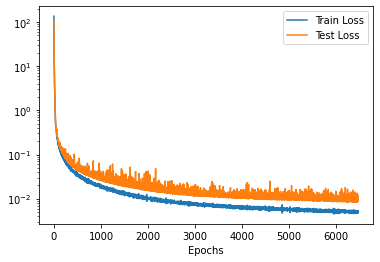

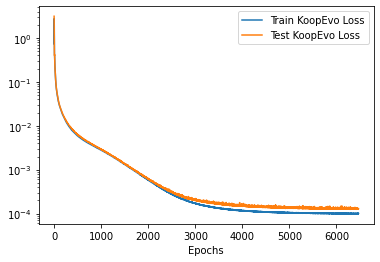

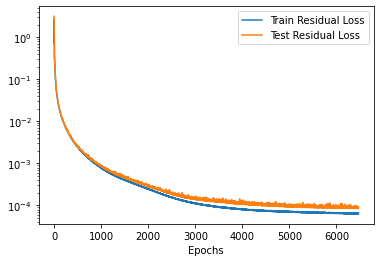

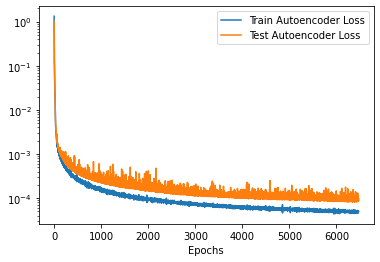

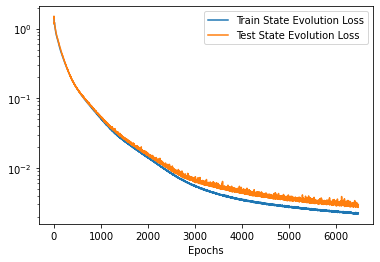

In [4]:
#plot learning curves
models[1].plot_learning_curves()

Loading Model Weights

In [5]:
for i in range(0,len(models)):
    models[i].load_weights(min_test_loss = True)

Loading Data

In [6]:
#Loading Data
for i in tqdm([0,1,2,3], desc="Loading Data", unit="model"):
    models[i].load_and_preproc_data()
    models[i].create_dataset(mode = "Test")
    del models[i].lp_data

Loading Data:   0%|          | 0/4 [00:00<?, ?model/s]

State Dims:  256
Not normalizing Input
Test_Shape:  (1, 7500, 256)
Time:  0.3353383541107178


Loading Data:  25%|██▌       | 1/4 [00:07<00:21,  7.24s/model]

State Dims:  256
Not normalizing Input
Test_Shape:  (1, 7500, 256)
Time:  0.3441143035888672


Loading Data:  50%|█████     | 2/4 [00:18<00:19,  9.72s/model]

State Dims:  256
Not normalizing Input
Test_Shape:  (1, 7500, 256)
Time:  0.3551356792449951


Loading Data:  75%|███████▌  | 3/4 [00:36<00:13, 13.59s/model]

State Dims:  256
Not normalizing Input
Test_Shape:  (1, 7500, 256)
Time:  0.307586669921875


Loading Data: 100%|██████████| 4/4 [00:43<00:00, 10.92s/model]


In [9]:
#Predictability
timesteps = 1000
num_samples = 10

for i in [0,1,2,3]:
    print("Model# ", i)
    coeff_i = models[i].sampled_prediction_limit(models[i].test_data, timesteps, lt, num_samples)
    np.save(f'Plot_Sub/Plot_KS_Noise/coeff_dict{i}.npy',coeff_i)


Model#  0


Processing:   0%|          | 0/10 [00:00<?, ?iteration/s]

d:\Anaconda\envs\tf-gpu\lib\site-packages\torch\nn\modules\rnn.py:812: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\RNN.cpp:982.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,
Processing: 100%|██████████| 10/10 [00:24<00:00,  2.45s/iteration]

Model#  1


AttributeError: 'Eval_MZA' object has no attribute 'test_data'

In [ ]:
coeff_data = []
for coeff_i in [0,1,2,3]:
    coeff_i_data = np.load(f'Plot_Sub/Plot_KS_Noise/coeff_dict{i}.npy')
    coeff_data.append(coeff_i_data)
     
    print(np.max(coeff_i_data))

In [ ]:
#Using STD
plt.figure(dpi = 1000)
# Plot with variable length error bars

i = 0
for model_i in [0,1,2,3]:

    if model_i in [0]:
        x_index = 0.001
    elif model_i in [1]:
        x_index = 0.01
    elif model_i in [2]:
        x_index = 0.1
    elif model_i in [3]:
        x_index = 0.3

    print("mean", np.mean(coeff_data[i]))
    print("std", np.std(coeff_data[i]))
    plt.errorbar([x_index], np.mean(coeff_data[i]), yerr= np.std(coeff_data[i]), color = "black", fmt='o', capsize=5, label='Data with Variable Length Error Bars')
    i+=1
# Customize the plot
plt.xlabel('p')
plt.ylabel('Lyapunov Time Units')

# plt.title('Error Bar Plot with Variable Length Error Bars')

plt.xscale('log')
plt.ylim(0, 2)
plt.xlim(1e-4, 1)

plt.grid()
# plt.legend()
plt.grid(True, which='both')

plt.axhspan(0.8, 1.2, facecolor='lightgray', alpha=0.5, label='Shaded Area (5%)')

plt.show()